# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

In [6]:
#get all attributes
data_id = data.set_index('Id')
attributes64 = data_id.iloc[:, :-1]
attributes64.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,
4510,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,3649.0,0.141650,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334
3537,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,38823.0,-0.018502,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782
3920,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,6565.2,0.049940,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361
1806,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,29652.0,0.027178,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602
1529,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,1241.0,-0.020100,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742


In [7]:
# to numeric
for i in range(len(attributes64.columns)):
    attributes64[attributes64.columns[i]] = pd.to_numeric(attributes64[attributes64.columns[i]], errors = 'coerce', downcast = 'float')

attributes64.info()
attributes64.head(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 4510 to 3294
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      4816 non-null   float32
 1   X2      4816 non-null   float32
 2   X3      4816 non-null   float32
 3   X4      4803 non-null   float32
 4   X5      4808 non-null   float32
 5   X6      4816 non-null   float32
 6   X7      4816 non-null   float32
 7   X8      4804 non-null   float32
 8   X9      4818 non-null   float32
 9   X10     4816 non-null   float32
 10  X11     4816 non-null   float32
 11  X12     4803 non-null   float32
 12  X13     4818 non-null   float32
 13  X14     4816 non-null   float32
 14  X15     4812 non-null   float32
 15  X16     4804 non-null   float32
 16  X17     4804 non-null   float32
 17  X18     4816 non-null   float32
 18  X19     4818 non-null   float32
 19  X20     4818 non-null   float32
 20  X21     4744 non-null   float32
 21  X22     4816 non-null   float32
 2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,
4510,0.025417,0.417690,0.056800,1.16050,-126.389999,0.413550,0.025417,1.239500,1.16500,0.51773,...,3649.000000,0.141650,0.049094,0.858350,0.123220,5.616700,7.404200,164.309998,2.221400,1.334000
3537,-0.023834,0.210100,0.508390,4.23740,22.034000,0.058412,-0.027621,3.657900,0.98183,0.76855,...,38823.000000,-0.018502,-0.031011,1.018500,0.069047,5.799600,7.752900,26.445999,13.802000,6.478200
3920,0.030515,0.446060,0.195690,1.56500,35.765999,0.281960,0.039264,0.884560,1.05260,0.39457,...,6565.200195,0.049940,0.077337,0.950060,0.252660,15.049000,2.817900,104.730003,3.485200,2.636100
1806,0.052318,0.056366,0.545620,10.68000,438.200012,0.136490,0.058164,10.853000,1.02790,0.61173,...,29652.000000,0.027178,0.085524,0.972820,0.000000,6.015700,7.462600,48.756001,7.486300,1.060200
1529,0.000992,0.497120,0.123160,1.30360,-71.398003,0.000000,0.001007,1.011600,1.29210,0.50288,...,1241.000000,-0.020100,0.001974,0.999250,0.019736,3.481900,8.582000,114.580002,3.185400,2.742000
3798,0.030779,0.430120,0.044111,1.15690,806.419983,0.000000,0.043742,0.769230,1.07020,0.33086,...,1.156900,1.000000,0.093029,0.094416,0.815010,9.799900,8.622000,95.865997,3.807400,2.488100
1459,0.047992,0.434270,0.165220,1.40880,8.551100,0.253110,0.059254,1.237600,1.06640,0.53744,...,5561.899902,0.062276,0.089297,0.937720,0.056044,18.222000,6.051800,68.652000,5.316700,4.989800
2898,0.144750,0.072429,0.385560,6.32330,66.903000,0.492910,0.144750,12.793000,1.06340,0.92662,...,6083.600098,0.059624,0.156220,0.940380,0.000000,52.278999,128.160004,13.042000,27.987000,3.740000
4470,0.014100,0.009606,0.045630,5.75020,74.068001,0.016626,0.017437,103.099998,1.08290,0.99039,...,533.780029,0.076555,0.014237,0.923440,0.000000,NaN,4.686000,14.837000,24.601000,0.250130


In [8]:
(attributes64.mean()).head(10)

X1     -0.055232
X2      0.533272
X3      0.188993
X4      4.978602
X5     19.564419
X6     -0.070060
X7     -0.042516
X8      5.739983
X9      1.579278
X10     0.503606
dtype: float32

In [9]:
# replace NaN and zero to mean
attributes64.replace(0,attributes64.mean(), inplace = True)
attributes64 = attributes64.fillna(attributes64.mean())

In [10]:
attributes64.head(30)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
Id,,,,,,,,,,,,,,,,,,,,,
4510,0.025417,0.417690,0.056800,1.16050,-126.389999,0.413550,0.025417,1.239500,1.16500,0.51773,...,3649.000000,0.141650,0.049094,0.858350,0.123220,5.616700,7.404200,164.309998,2.221400,1.334000
3537,-0.023834,0.210100,0.508390,4.23740,22.034000,0.058412,-0.027621,3.657900,0.98183,0.76855,...,38823.000000,-0.018502,-0.031011,1.018500,0.069047,5.799600,7.752900,26.445999,13.802000,6.478200
3920,0.030515,0.446060,0.195690,1.56500,35.765999,0.281960,0.039264,0.884560,1.05260,0.39457,...,6565.200195,0.049940,0.077337,0.950060,0.252660,15.049000,2.817900,104.730003,3.485200,2.636100
1806,0.052318,0.056366,0.545620,10.68000,438.200012,0.136490,0.058164,10.853000,1.02790,0.61173,...,29652.000000,0.027178,0.085524,0.972820,0.273026,6.015700,7.462600,48.756001,7.486300,1.060200
1529,0.000992,0.497120,0.123160,1.30360,-71.398003,-0.070060,0.001007,1.011600,1.29210,0.50288,...,1241.000000,-0.020100,0.001974,0.999250,0.019736,3.481900,8.582000,114.580002,3.185400,2.742000
3798,0.030779,0.430120,0.044111,1.15690,806.419983,-0.070060,0.043742,0.769230,1.07020,0.33086,...,1.156900,1.000000,0.093029,0.094416,0.815010,9.799900,8.622000,95.865997,3.807400,2.488100
1459,0.047992,0.434270,0.165220,1.40880,8.551100,0.253110,0.059254,1.237600,1.06640,0.53744,...,5561.899902,0.062276,0.089297,0.937720,0.056044,18.222000,6.051800,68.652000,5.316700,4.989800
2898,0.144750,0.072429,0.385560,6.32330,66.903000,0.492910,0.144750,12.793000,1.06340,0.92662,...,6083.600098,0.059624,0.156220,0.940380,0.273026,52.278999,128.160004,13.042000,27.987000,3.740000
4470,0.014100,0.009606,0.045630,5.75020,74.068001,0.016626,0.017437,103.099998,1.08290,0.99039,...,533.780029,0.076555,0.014237,0.923440,0.273026,1108.793457,4.686000,14.837000,24.601000,0.250130


[2.3391210e-01 1.7901906e-01 1.1606196e-01 5.1513042e-02 3.6018893e-02
 3.1250510e-02 2.9874420e-02 2.7959468e-02 2.5786791e-02 2.2664662e-02
 1.9477004e-02 1.7631439e-02 1.7226201e-02 1.6920347e-02 1.6403079e-02
 1.5635163e-02 1.5621180e-02 1.5564176e-02 1.5091156e-02 1.4831169e-02
 1.3794403e-02 1.3541517e-02 1.0093830e-02 8.0781328e-03 7.3110932e-03
 5.4879365e-03 4.8266286e-03 4.4136643e-03 2.6548617e-03 2.2625143e-03
 2.0931461e-03 1.6893952e-03 1.1903805e-03 8.4567087e-04 6.3902151e-04
 5.3439668e-04 4.6309756e-04 3.7264908e-04 3.3334427e-04 2.7521947e-04
 2.1591905e-04 1.3936590e-04 7.3816656e-05 6.0354192e-05 3.7646972e-05
 2.5907184e-05 2.1128342e-05 1.8863295e-05 1.6198352e-05 7.9923111e-06
 6.0654561e-06 3.6772676e-06 2.1652143e-06 1.7211039e-06 1.5080357e-06
 1.4643490e-06 1.3478966e-06 7.6886613e-07 5.1419988e-07 3.3144397e-07
 2.9455234e-07 2.0555545e-07 1.9501943e-11 6.7729580e-16]
1.0000001


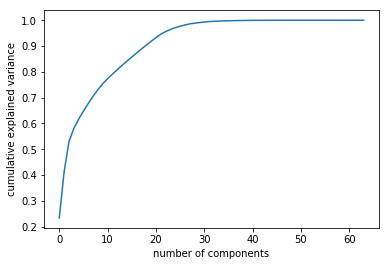

In [11]:
# PCA to reduce dimensions
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

n_components = 64
pca = PCA(n_components=n_components)
scaler = StandardScaler()

pipeline_pca = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean')), ('transform', scaler), ('pca', pca)])
pipeline_pca.fit(attributes64)


print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [12]:
# as we can see, when the number of components is about 30, explained more than 95% total variance
# so we can use these 30 components to replace our original attributes
components = pipeline_pca.fit_transform(attributes64)
components = pd.DataFrame(components).iloc[:, :31]
components

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.117244,-0.142087,-0.181436,-0.185836,-0.174920,-0.021490,-0.031654,-0.049341,0.277311,0.637196,...,-0.243564,0.179298,-0.307226,0.148335,-0.011668,0.049436,-0.022718,0.073290,0.003163,-0.074159
1,0.012105,-0.051782,-0.061142,-0.594100,0.091209,-0.018620,-0.159056,-0.184829,0.245301,0.821099,...,-0.052606,0.101024,-0.241587,0.067189,0.004748,0.037084,-0.042535,-0.066970,-0.073177,0.059650
2,-0.109113,-0.129111,-0.054107,-0.192140,-0.023432,-0.016106,-0.125840,-0.118472,0.155488,0.506113,...,-0.187125,0.130958,-0.031995,0.028555,-0.072356,-0.032602,0.043437,-0.058952,0.002553,-0.010044
3,-0.076969,0.101864,-0.213165,-0.691383,-0.006841,-0.018871,-0.141958,-0.152274,0.206832,0.645223,...,-0.061306,0.015976,-0.187914,0.018645,0.021149,-0.036630,-0.009655,-0.006525,0.013428,-0.013903
4,-0.076306,-0.124200,-0.003087,0.008907,0.152683,-0.020815,-0.009478,0.038893,0.097739,-0.019340,...,-0.136292,-0.178895,0.143151,-0.074921,0.047452,0.045642,-0.100425,0.057275,-0.006239,-0.055614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4813,-0.102135,-0.062514,-0.362893,-0.394590,-0.287466,0.001836,0.011437,0.029388,0.178016,0.143597,...,-0.212675,-0.092085,0.247884,-0.089838,-0.034117,-0.018799,-0.019453,0.114035,0.015925,-0.171689
4814,-0.091458,0.176271,-0.466746,-0.725040,-0.335546,-0.019518,-0.091516,-0.090951,0.183989,0.402188,...,-0.141170,0.096407,-0.016754,-0.025495,-0.084481,0.000148,0.002590,0.019157,0.038206,-0.004581
4815,0.038222,-0.083422,-0.092216,-0.138685,0.099542,-0.014892,-0.170833,-0.124641,-0.071913,-0.026743,...,-0.176464,-0.021477,0.447817,-0.164454,-0.040784,-0.013367,-0.006153,-0.098051,-0.049174,0.112934
4816,0.193251,0.911397,-0.604581,0.167144,-0.780581,-0.024288,0.138102,0.062599,-0.487467,-2.991163,...,1.178184,0.154424,-1.136869,0.375116,0.187049,0.399347,0.052862,0.398331,-0.180160,-0.374264


In [13]:
from sklearn.model_selection import train_test_split
X = attributes64
y = data[['Bankrupt']]

X_train = None
X_test = None
y_train = None
y_test = None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (4336, 64)
X_test shape:  (482, 64)
y_train shape:  (4336, 1)
y_test shape:  (482, 1)


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report as cr
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

scaler = StandardScaler()
pca = PCA(n_components=31)

# logistic regression

In [15]:
# logistic regression
LR = LogisticRegression()
pipeline_LR = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('transform', scaler), ('classify', LR)])

param_grid = {
    'classify__penalty': ['l2'],
    'classify__C': [0.01, 0.1, 1, 2],
    'classify__class_weight': [{0:0.05, 1:0.95}, {0:0.02, 1:0.98}, {0:0.01, 1:0.99}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
}

grid_LR = GridSearchCV(pipeline_LR, param_grid , cv=5, scoring='balanced_accuracy')
grid_LR.fit(X_train, y_train)


print("Best parameter (CV score=%0.3f):" % grid_LR.best_score_)
print(grid_LR.best_params_)
pd.DataFrame(grid_LR.cv_results_)

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('transform', StandardScaler()),
                                       ('classify', LogisticRegression())]),
             param_grid={'classify__C': [0.01, 0.1, 1, 2],
                         'classify__class_weight': [{0: 0.05, 1: 0.95},
                                                    {0: 0.02, 1: 0.98},
                                                    {0: 0.01, 1: 0.99},
                                                    {0: 0.1, 1: 0.9},
                                                    {0: 0.2, 1: 0.8}],
                         'classify__penalty': ['l2']},
             scoring='balanced_accuracy')

Best parameter (CV score=0.737):
{'classify__C': 1, 'classify__class_weight': {0: 0.05, 1: 0.95}, 'classify__penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__C,param_classify__class_weight,param_classify__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069974,0.006572,0.009373,0.007653,0.01,"{0: 0.05, 1: 0.95}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.746082,0.722251,0.691977,0.720898,0.741435,0.724529,0.019122,4
1,0.070479,0.008641,0.009309,0.008638,0.01,"{0: 0.02, 1: 0.98}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.493020,0.502454,0.504908,0.514522,0.501229,0.503226,0.006916,19
2,0.070889,0.013954,0.008244,0.007040,0.01,"{0: 0.01, 1: 0.99}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.500000,0.500000,0.501840,0.504300,0.500000,0.501228,0.001693,20
3,0.073865,0.007579,0.007071,0.007143,0.01,"{0: 0.1, 1: 0.9}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.590277,0.646697,0.582657,0.649541,0.590480,0.611930,0.029696,8
4,0.070272,0.007526,0.007313,0.009113,0.01,"{0: 0.2, 1: 0.8}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.561130,0.561173,0.537235,0.541642,0.558667,0.551969,0.010366,15
5,0.073819,0.011527,0.011729,0.003275,0.1,"{0: 0.05, 1: 0.95}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.777521,0.728374,0.680710,0.721907,0.753500,0.732402,0.032494,3
6,0.075361,0.005812,0.008482,0.004324,0.1,"{0: 0.02, 1: 0.98}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.517328,0.567272,0.542933,0.603982,0.585995,0.563502,0.030705,14
7,0.075502,0.011786,0.004858,0.003331,0.1,"{0: 0.01, 1: 0.99}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.494861,0.508589,0.496720,0.526193,0.505528,0.506378,0.011173,18
8,0.076033,0.005010,0.008292,0.005423,0.1,"{0: 0.1, 1: 0.9}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.667438,0.693759,0.635241,0.664944,0.615931,0.655463,0.027098,7
9,0.086126,0.005043,0.005251,0.003953,0.1,"{0: 0.2, 1: 0.8}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.585751,0.612117,0.541942,0.595788,0.580826,0.583285,0.023276,13


In [16]:
y_pred_LR = grid_LR.predict(X_test)
confusion_matrix(y_test, y_pred_LR)
print(cr(y_test, y_pred_LR))

array([[324, 113],
       [  8,  37]], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       437
           1       0.25      0.82      0.38        45

    accuracy                           0.75       482
   macro avg       0.61      0.78      0.61       482
weighted avg       0.91      0.75      0.80       482



In [17]:
# logistic regression using pca
LR = LogisticRegression()
pipeline_pca_LR = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('transform', scaler), ('pca', pca), ('classify', LR)])

param_grid = {
    'classify__penalty': ['l2'],
    'classify__C': [0.01, 0.1, 1, 2],
    'classify__class_weight': [{0:0.05, 1:0.95}, {0:0.02, 1:0.98}, {0:0.01, 1:0.99}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}]
}

grid_pca_LR = GridSearchCV(pipeline_pca_LR, param_grid , cv=5, scoring='balanced_accuracy')
grid_pca_LR.fit(X_train, y_train)


print("Best parameter (CV score=%0.3f):" % grid_pca_LR.best_score_)
print(grid_pca_LR.best_params_)
pd.DataFrame(grid_pca_LR.cv_results_)

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('transform', StandardScaler()),
                                       ('pca', PCA(n_components=31)),
                                       ('classify', LogisticRegression())]),
             param_grid={'classify__C': [0.01, 0.1, 1, 2],
                         'classify__class_weight': [{0: 0.05, 1: 0.95},
                                                    {0: 0.02, 1: 0.98},
                                                    {0: 0.01, 1: 0.99},
                                                    {0: 0.1, 1: 0.9},
                                                    {0: 0.2, 1: 0.8}],
                         'classify__penalty': ['l2']},
             scoring='balanced_accuracy')

Best parameter (CV score=0.731):
{'classify__C': 1, 'classify__class_weight': {0: 0.05, 1: 0.95}, 'classify__penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__C,param_classify__class_weight,param_classify__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092871,0.008633,0.005899,0.003610,0.01,"{0: 0.05, 1: 0.95}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.742401,0.712636,0.691364,0.716599,0.739593,0.720518,0.018816,3
1,0.088362,0.010932,0.007441,0.002941,0.01,"{0: 0.02, 1: 0.98}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.493020,0.502454,0.504908,0.513908,0.501229,0.503104,0.006717,19
2,0.093427,0.003726,0.011536,0.002743,0.01,"{0: 0.01, 1: 0.99}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.500000,0.500000,0.501840,0.504300,0.500000,0.501228,0.001693,20
3,0.087764,0.009692,0.009248,0.001571,0.01,"{0: 0.1, 1: 0.9}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.609758,0.647310,0.582657,0.630059,0.590480,0.612053,0.024092,8
4,0.092227,0.010192,0.008687,0.003363,0.01,"{0: 0.2, 1: 0.8}",l2,"{'classify__C': 0.01, 'classify__class_weight'...",0.551696,0.561786,0.537235,0.542256,0.558667,0.550328,0.009373,15
5,0.089692,0.013825,0.009247,0.000994,0.1,"{0: 0.05, 1: 0.95}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.740016,0.716918,0.687258,0.712079,0.740381,0.719330,0.019789,4
6,0.095417,0.009769,0.007467,0.003338,0.1,"{0: 0.02, 1: 0.98}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.524922,0.557043,0.541092,0.597840,0.579853,0.560150,0.026163,14
7,0.089285,0.008353,0.010510,0.004863,0.1,"{0: 0.01, 1: 0.99}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.494861,0.508589,0.496720,0.525578,0.505528,0.506255,0.010955,18
8,0.098549,0.007855,0.007628,0.003892,0.1,"{0: 0.1, 1: 0.9}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.657391,0.675755,0.644856,0.666172,0.614703,0.651775,0.021148,7
9,0.090646,0.014260,0.010089,0.000023,0.1,"{0: 0.2, 1: 0.8}",l2,"{'classify__C': 0.1, 'classify__class_weight':...",0.576930,0.613344,0.541328,0.603994,0.580212,0.583162,0.025070,13


In [18]:
y_pred_pca_LR = grid_pca_LR.predict(X_test)
confusion_matrix(y_test, y_pred_pca_LR)
print(cr(y_test, y_pred_pca_LR))

array([[322, 115],
       [  7,  38]], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       437
           1       0.25      0.84      0.38        45

    accuracy                           0.75       482
   macro avg       0.61      0.79      0.61       482
weighted avg       0.91      0.75      0.80       482



In [19]:
# the pca slightly improves the logistic regression model

# random forest

In [20]:
# random forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(oob_score='True')
pipeline_rf = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('classify', RF)])

param_grid = {
    'classify__n_estimators':[20, 40, 50],
    'classify__max_depth':[2, 5, 7],
    'classify__class_weight': [{0:0.02, 1:0.98}, {0:0.05, 1:0.95}]
}

grid_rf = GridSearchCV(pipeline_rf, param_grid , cv=5, scoring='balanced_accuracy')
grid_rf.fit(X_train, y_train)


print("Best parameter (CV score=%0.3f):" % grid_rf.best_score_)
print(grid_rf.best_params_)
pd.DataFrame(grid_rf.cv_results_)

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute an

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('classify',
                                        RandomForestClassifier(oob_score='True'))]),
             param_grid={'classify__class_weight': [{0: 0.02, 1: 0.98},
                                                    {0: 0.05, 1: 0.95}],
                         'classify__max_depth': [2, 5, 7],
                         'classify__n_estimators': [20, 40, 50]},
             scoring='balanced_accuracy')

Best parameter (CV score=0.772):
{'classify__class_weight': {0: 0.02, 1: 0.98}, 'classify__max_depth': 5, 'classify__n_estimators': 40}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__class_weight,param_classify__max_depth,param_classify__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.219761,0.023059,0.013640,0.002892,"{0: 0.02, 1: 0.98}",2,20,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.699687,0.661751,0.688332,0.683788,0.689491,0.684610,0.012556,16
1,0.374364,0.013871,0.012107,0.004069,"{0: 0.02, 1: 0.98}",2,40,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.657588,0.654377,0.688532,0.683394,0.691113,0.675001,0.015759,18
2,0.464655,0.019303,0.017352,0.006869,"{0: 0.02, 1: 0.98}",2,50,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.656592,0.637199,0.695493,0.694451,0.692168,0.675181,0.023919,17
3,0.349671,0.017293,0.008076,0.004038,"{0: 0.02, 1: 0.98}",5,20,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.806274,0.778079,0.720375,0.760825,0.731294,0.759369,0.031180,5
4,0.660311,0.010006,0.014973,0.005257,"{0: 0.02, 1: 0.98}",5,40,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.821079,0.806925,0.730805,0.728443,0.772101,0.771871,0.038007,1
5,0.754094,0.029224,0.018973,0.003535,"{0: 0.02, 1: 0.98}",5,50,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.813485,0.776852,0.716895,0.780307,0.748934,0.767295,0.032470,2
6,0.393272,0.026279,0.010927,0.005806,"{0: 0.02, 1: 0.98}",7,20,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.825443,0.809969,0.689665,0.751738,0.738399,0.763043,0.049427,3
7,0.719046,0.017100,0.011674,0.003221,"{0: 0.02, 1: 0.98}",7,40,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.812096,0.820198,0.696213,0.692457,0.744541,0.753101,0.054717,9
8,0.882576,0.037193,0.015302,0.004355,"{0: 0.02, 1: 0.98}",7,50,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.810869,0.834722,0.693759,0.710711,0.707420,0.751496,0.058977,11
9,0.217000,0.012466,0.012015,0.006043,"{0: 0.05, 1: 0.95}",2,20,"{'classify__class_weight': {0: 0.05, 1: 0.95},...",0.796226,0.785842,0.736940,0.762667,0.720806,0.760496,0.028475,4


In [21]:
y_pred_rf = grid_rf.predict(X_test)
confusion_matrix(y_test, y_pred_rf)
print(cr(y_test, y_pred_rf))

array([[335, 102],
       [  7,  38]], dtype=int64)

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       437
           1       0.27      0.84      0.41        45

    accuracy                           0.77       482
   macro avg       0.63      0.81      0.64       482
weighted avg       0.91      0.77      0.82       482



In [22]:
# random forest using pca
pipeline_pca_rf = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('transform', scaler), ('pca', pca), ('classify', RF)])

param_grid = {
    'classify__n_estimators':[20, 30, 40],
    'classify__max_depth':[2, 5, 7],
    'classify__class_weight': [{0:0.02, 1:0.98}, {0:0.05, 1:0.95}]
}

grid_pca_rf = GridSearchCV(pipeline_pca_rf, param_grid , cv=5, scoring='balanced_accuracy')
grid_pca_rf.fit(X_train, y_train)


print("Best parameter (CV score=%0.3f):" % grid_pca_rf.best_score_)
print(grid_pca_rf.best_params_)
pd.DataFrame(grid_pca_rf.cv_results_)

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute an

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('transform', StandardScaler()),
                                       ('pca', PCA(n_components=31)),
                                       ('classify',
                                        RandomForestClassifier(oob_score='True'))]),
             param_grid={'classify__class_weight': [{0: 0.02, 1: 0.98},
                                                    {0: 0.05, 1: 0.95}],
                         'classify__max_depth': [2, 5, 7],
                         'classify__n_estimators': [20, 30, 40]},
             scoring='balanced_accuracy')

Best parameter (CV score=0.747):
{'classify__class_weight': {0: 0.05, 1: 0.95}, 'classify__max_depth': 2, 'classify__n_estimators': 40}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__class_weight,param_classify__max_depth,param_classify__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.243814,0.016822,0.013686,0.006776,"{0: 0.02, 1: 0.98}",2,20,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.534738,0.507975,0.562164,0.592138,0.500000,0.539403,0.034238,16
1,0.298738,0.005910,0.018412,0.001398,"{0: 0.02, 1: 0.98}",2,30,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.573157,0.523313,0.528221,0.517199,0.544006,0.537179,0.020063,17
2,0.363176,0.020220,0.017313,0.004038,"{0: 0.02, 1: 0.98}",2,40,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.531670,0.518405,0.559096,0.532115,0.502457,0.528749,0.018650,18
3,0.343308,0.014756,0.015888,0.003085,"{0: 0.02, 1: 0.98}",5,20,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.748686,0.719585,0.682551,0.669869,0.738364,0.711811,0.030791,7
4,0.442935,0.012771,0.017736,0.002990,"{0: 0.02, 1: 0.98}",5,30,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.764637,0.727773,0.680510,0.659775,0.745955,0.715730,0.039552,4
5,0.516825,0.030425,0.017719,0.003900,"{0: 0.02, 1: 0.98}",5,40,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.752136,0.741069,0.680510,0.664909,0.737750,0.715275,0.035425,5
6,0.351640,0.012313,0.020097,0.006532,"{0: 0.02, 1: 0.98}",7,20,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.738315,0.684981,0.670446,0.609835,0.712206,0.683157,0.043422,12
7,0.483711,0.027762,0.014503,0.004656,"{0: 0.02, 1: 0.98}",7,30,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.789860,0.729979,0.658377,0.627474,0.723657,0.705869,0.057190,9
8,0.601193,0.015252,0.016815,0.003773,"{0: 0.02, 1: 0.98}",7,40,"{'classify__class_weight': {0: 0.02, 1: 0.98},...",0.756187,0.733459,0.654483,0.628923,0.706017,0.695814,0.047642,11
9,0.239932,0.011886,0.015304,0.004331,"{0: 0.05, 1: 0.95}",2,20,"{'classify__class_weight': {0: 0.05, 1: 0.95},...",0.796770,0.748419,0.673348,0.696896,0.713307,0.725748,0.043107,3


In [23]:
y_pred_pca_rf = grid_pca_rf.predict(X_test)
confusion_matrix(y_test, y_pred_pca_rf)
print(cr(y_test, y_pred_pca_rf))

array([[306, 131],
       [  8,  37]], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       437
           1       0.22      0.82      0.35        45

    accuracy                           0.71       482
   macro avg       0.60      0.76      0.58       482
weighted avg       0.90      0.71      0.77       482



In [24]:
# the pca is tested to make the random forest model even worse

# gradient boosting

In [25]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
pipeline_gb = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('classify', GB)])

param_grid = {
    'classify__n_estimators':[20, 40, 50],
    'classify__max_depth':[2, 5, 7]
}

grid_gb = GridSearchCV(pipeline_gb, param_grid , cv=5, scoring='balanced_accuracy')
grid_gb.fit(X_train, y_train)


print("Best parameter (CV score=%0.3f):" % grid_gb.best_score_)
print(grid_gb.best_params_)
pd.DataFrame(grid_gb.cv_results_)

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('classify',
                                        GradientBoostingClassifier())]),
             param_grid={'classify__max_depth': [2, 5, 7],
                         'classify__n_estimators': [20, 40, 50]},
             scoring='balanced_accuracy')

Best parameter (CV score=0.776):
{'classify__max_depth': 7, 'classify__n_estimators': 50}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__max_depth,param_classify__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.192683,0.052813,0.006874,0.003945,2,20,"{'classify__max_depth': 2, 'classify__n_estima...",0.695659,0.594927,0.625000,0.594340,0.621413,0.626268,0.036992,9
1,2.389548,0.048775,0.009264,0.001009,2,40,"{'classify__max_depth': 2, 'classify__n_estima...",0.722734,0.661621,0.681465,0.688679,0.684379,0.687776,0.019791,8
2,2.877004,0.065673,0.007681,0.003925,2,50,"{'classify__max_depth': 2, 'classify__n_estima...",0.731555,0.700696,0.699469,0.669197,0.693199,0.698823,0.019923,7
3,2.834570,0.123614,0.006475,0.004504,5,20,"{'classify__max_depth': 5, 'classify__n_estima...",0.742829,0.759002,0.728315,0.752260,0.758008,0.748083,0.011433,6
4,5.655478,0.103587,0.008089,0.004044,5,40,"{'classify__max_depth': 5, 'classify__n_estima...",0.781792,0.794396,0.725248,0.770514,0.754323,0.765254,0.023960,4
5,7.048389,0.166419,0.002829,0.003748,5,50,"{'classify__max_depth': 5, 'classify__n_estima...",0.789999,0.803398,0.735477,0.762308,0.758008,0.769838,0.024125,3
6,3.882027,0.028415,0.011493,0.004341,7,20,"{'classify__max_depth': 7, 'classify__n_estima...",0.762924,0.777006,0.708471,0.770514,0.750417,0.753866,0.024361,5
7,7.763328,0.027086,0.011858,0.004213,7,40,"{'classify__max_depth': 7, 'classify__n_estima...",0.797592,0.776392,0.736090,0.798816,0.748574,0.771493,0.025418,2
8,9.545941,0.085031,0.006013,0.004951,7,50,"{'classify__max_depth': 7, 'classify__n_estima...",0.799433,0.796850,0.734863,0.798816,0.747960,0.775584,0.028220,1


In [26]:
y_pred_gb = grid_gb.predict(X_test)
confusion_matrix(y_test, y_pred_gb)
print(cr(y_test, y_pred_gb))

array([[435,   2],
       [ 18,  27]], dtype=int64)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       437
           1       0.93      0.60      0.73        45

    accuracy                           0.96       482
   macro avg       0.95      0.80      0.85       482
weighted avg       0.96      0.96      0.95       482



In [27]:
# gradient boosting using pca
pipeline_pca_gb = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('pca', pca), ('classify', GB)])

param_grid = {
    'classify__n_estimators':[20, 40, 50],
    'classify__max_depth':[2, 5, 7]
}

grid_pca_gb = GridSearchCV(pipeline_pca_gb, param_grid , cv=5, scoring='balanced_accuracy')
grid_pca_gb.fit(X_train, y_train)


print("Best parameter (CV score=%0.3f):" % grid_pca_gb.best_score_)
print(grid_pca_gb.best_params_)
pd.DataFrame(grid_pca_gb.cv_results_)

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('pca', PCA(n_components=31)),
                                       ('classify',
                                        GradientBoostingClassifier())]),
             param_grid={'classify__max_depth': [2, 5, 7],
                         'classify__n_estimators': [20, 40, 50]},
             scoring='balanced_accuracy')

Best parameter (CV score=0.652):
{'classify__max_depth': 5, 'classify__n_estimators': 50}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__max_depth,param_classify__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.708782,0.029698,0.005806,0.006691,2,20,"{'classify__max_depth': 2, 'classify__n_estima...",0.565424,0.537848,0.519231,0.555375,0.534665,0.542509,0.016222,9
1,1.314083,0.023693,0.006244,0.004034,2,40,"{'classify__max_depth': 2, 'classify__n_estima...",0.611367,0.555852,0.518004,0.593111,0.562966,0.568260,0.032198,8
2,1.665486,0.032259,0.007218,0.007186,2,50,"{'classify__max_depth': 2, 'classify__n_estima...",0.611367,0.555852,0.555852,0.611365,0.600088,0.586905,0.025687,7
3,1.529059,0.046334,0.013276,0.005944,5,20,"{'classify__max_depth': 5, 'classify__n_estima...",0.674337,0.631548,0.602088,0.637824,0.635367,0.636233,0.022991,4
4,2.975880,0.045007,0.010692,0.005752,5,40,"{'classify__max_depth': 5, 'classify__n_estima...",0.682544,0.649552,0.612931,0.634138,0.652392,0.646311,0.022903,3
5,3.650616,0.031511,0.009621,0.005232,5,50,"{'classify__max_depth': 5, 'classify__n_estima...",0.689524,0.667555,0.603315,0.664283,0.634138,0.651763,0.029966,1
6,2.083991,0.028598,0.007678,0.006428,7,20,"{'classify__max_depth': 7, 'classify__n_estima...",0.645422,0.649552,0.572015,0.615885,0.638658,0.624306,0.028616,6
7,4.010557,0.118165,0.009822,0.001296,7,40,"{'classify__max_depth': 7, 'classify__n_estima...",0.682544,0.686173,0.599021,0.625933,0.648092,0.648353,0.033274,2
8,5.089518,0.108722,0.008010,0.005493,7,50,"{'classify__max_depth': 7, 'classify__n_estima...",0.652402,0.659167,0.591859,0.635981,0.627996,0.633481,0.023607,5


In [28]:
y_pred_pca_gb = grid_pca_gb.predict(X_test)
confusion_matrix(y_test, y_pred_pca_gb)
print(cr(y_test, y_pred_pca_gb))

array([[435,   2],
       [ 27,  18]], dtype=int64)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       437
           1       0.90      0.40      0.55        45

    accuracy                           0.94       482
   macro avg       0.92      0.70      0.76       482
weighted avg       0.94      0.94      0.93       482



In [29]:
# the pca is tested to be bad also in gradient boosting

# SVC

In [30]:
# SVC
from sklearn.svm import SVC
svc = SVC()
pipeline_svc = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('transform', scaler), ('classify', svc)])

param_grid = {
    'classify__C':[0.01, 0.1, 1, 10],
    'classify__kernel':['poly', 'rbf', 'sigmoid'],
    'classify__degree':[3, 4, 5],
    'classify__class_weight': [{0:0.02, 1:0.98}, {0:0.05, 1:0.95}]
}

grid_svc = GridSearchCV(pipeline_svc, param_grid , cv=5, scoring='balanced_accuracy')
grid_svc.fit(X_train, y_train)


print("Best parameter (CV score=%0.3f):" % grid_svc.best_score_)
print(grid_svc.best_params_)
pd.DataFrame(grid_svc.cv_results_)

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('transform', StandardScaler()),
                                       ('classify', SVC())]),
             param_grid={'classify__C': [0.01, 0.1, 1, 10],
                         'classify__class_weight': [{0: 0.02, 1: 0.98},
                                                    {0: 0.05, 1: 0.95}],
                         'classify__degree': [3, 4, 5],
                         'classify__kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='balanced_accuracy')

Best parameter (CV score=0.731):
{'classify__C': 1, 'classify__class_weight': {0: 0.05, 1: 0.95}, 'classify__degree': 3, 'classify__kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__C,param_classify__class_weight,param_classify__degree,param_classify__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.161212,0.066981,0.193520,0.012660,0.01,"{0: 0.02, 1: 0.98}",3,poly,"{'classify__C': 0.01, 'classify__class_weight'...",0.492407,0.501840,0.501227,0.486046,0.501229,0.496550,0.006313,51
1,1.401039,0.015474,0.627334,0.036743,0.01,"{0: 0.02, 1: 0.98}",3,rbf,"{'classify__C': 0.01, 'classify__class_weight'...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,35
2,1.402096,0.065337,0.275243,0.014296,0.01,"{0: 0.02, 1: 0.98}",3,sigmoid,"{'classify__C': 0.01, 'classify__class_weight'...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,35
3,1.076138,0.041497,0.213956,0.019847,0.01,"{0: 0.02, 1: 0.98}",4,poly,"{'classify__C': 0.01, 'classify__class_weight'...",0.493634,0.504294,0.501840,0.470249,0.503071,0.494618,0.012744,57
4,1.393914,0.049693,0.657778,0.021678,0.01,"{0: 0.02, 1: 0.98}",4,rbf,"{'classify__C': 0.01, 'classify__class_weight'...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.019885,0.032820,0.453125,0.043523,10,"{0: 0.05, 1: 0.95}",4,rbf,"{'classify__C': 10, 'classify__class_weight': ...",0.756731,0.734096,0.710772,0.663414,0.751831,0.723369,0.034034,4
68,0.772495,0.120378,0.151656,0.026732,10,"{0: 0.05, 1: 0.95}",4,sigmoid,"{'classify__C': 10, 'classify__class_weight': ...",0.692001,0.651050,0.695434,0.604492,0.679917,0.664579,0.033861,10
69,1.082857,0.025979,0.185333,0.015881,10,"{0: 0.05, 1: 0.95}",5,poly,"{'classify__C': 10, 'classify__class_weight': ...",0.497315,0.480970,0.488745,0.468801,0.499166,0.486999,0.011180,67
70,0.999970,0.085452,0.411458,0.036581,10,"{0: 0.05, 1: 0.95}",5,rbf,"{'classify__C': 10, 'classify__class_weight': ...",0.756731,0.734096,0.710772,0.663414,0.751831,0.723369,0.034034,4


In [31]:
y_pred_svc = grid_svc.predict(X_test)
confusion_matrix(y_test, y_pred_svc)
print(cr(y_test, y_pred_svc))

array([[324, 113],
       [ 10,  35]], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       437
           1       0.24      0.78      0.36        45

    accuracy                           0.74       482
   macro avg       0.60      0.76      0.60       482
weighted avg       0.90      0.74      0.80       482



In [32]:
pipeline_pca_svc = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('transform', scaler), ('pca', pca), ('classify', svc)])

param_grid = {
    'classify__C':[0.01, 0.1, 1, 10],
    'classify__kernel':['poly', 'rbf', 'sigmoid'],
    'classify__degree':[3, 4, 5],
    'classify__class_weight': [{0:0.02, 1:0.98}, {0:0.05, 1:0.95}]
}

grid_pca_svc = GridSearchCV(pipeline_pca_svc, param_grid , cv=5, scoring='balanced_accuracy')
grid_pca_svc.fit(X_train, y_train)


print("Best parameter (CV score=%0.3f):" % grid_svc.best_score_)
print(grid_pca_svc.best_params_)
pd.DataFrame(grid_pca_svc.cv_results_)

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\soft\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('transform', StandardScaler()),
                                       ('pca', PCA(n_components=31)),
                                       ('classify', SVC())]),
             param_grid={'classify__C': [0.01, 0.1, 1, 10],
                         'classify__class_weight': [{0: 0.02, 1: 0.98},
                                                    {0: 0.05, 1: 0.95}],
                         'classify__degree': [3, 4, 5],
                         'classify__kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='balanced_accuracy')

Best parameter (CV score=0.731):
{'classify__C': 1, 'classify__class_weight': {0: 0.05, 1: 0.95}, 'classify__degree': 3, 'classify__kernel': 'rbf'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify__C,param_classify__class_weight,param_classify__degree,param_classify__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.952396,0.028733,0.197504,0.026506,0.01,"{0: 0.02, 1: 0.98}",3,poly,"{'classify__C': 0.01, 'classify__class_weight'...",0.492407,0.501840,0.500613,0.495480,0.501229,0.498314,0.003719,50
1,1.237112,0.019956,0.614085,0.026492,0.01,"{0: 0.02, 1: 0.98}",3,rbf,"{'classify__C': 0.01, 'classify__class_weight'...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,34
2,1.211324,0.060388,0.264370,0.011744,0.01,"{0: 0.02, 1: 0.98}",3,sigmoid,"{'classify__C': 0.01, 'classify__class_weight'...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,34
3,0.971207,0.032757,0.205024,0.013637,0.01,"{0: 0.02, 1: 0.98}",4,poly,"{'classify__C': 0.01, 'classify__class_weight'...",0.493634,0.504294,0.501840,0.470249,0.503071,0.494618,0.012744,55
4,1.213205,0.043390,0.620162,0.044900,0.01,"{0: 0.02, 1: 0.98}",4,rbf,"{'classify__C': 0.01, 'classify__class_weight'...",0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.952732,0.034795,0.451462,0.025190,10,"{0: 0.05, 1: 0.95}",4,rbf,"{'classify__C': 10, 'classify__class_weight': ...",0.759417,0.738804,0.698702,0.655429,0.779739,0.726418,0.044482,6
68,0.677192,0.136062,0.140251,0.026262,10,"{0: 0.05, 1: 0.95}",4,sigmoid,"{'classify__C': 10, 'classify__class_weight': ...",0.711483,0.649210,0.665975,0.670878,0.679303,0.675370,0.020554,10
69,0.996471,0.040552,0.221548,0.015421,10,"{0: 0.05, 1: 0.95}",5,poly,"{'classify__C': 10, 'classify__class_weight': ...",0.496088,0.480970,0.489972,0.468186,0.499780,0.486999,0.011358,68
70,0.957355,0.068571,0.474955,0.022753,10,"{0: 0.05, 1: 0.95}",5,rbf,"{'classify__C': 10, 'classify__class_weight': ...",0.759417,0.738804,0.698702,0.656043,0.779739,0.726541,0.044286,4


In [33]:
y_pred_pca_svc = grid_pca_svc.predict(X_test)
confusion_matrix(y_test, y_pred_pca_svc)
print(cr(y_test, y_pred_pca_svc))

array([[324, 113],
       [ 10,  35]], dtype=int64)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       437
           1       0.24      0.78      0.36        45

    accuracy                           0.74       482
   macro avg       0.60      0.76      0.60       482
weighted avg       0.90      0.74      0.80       482



In [34]:
# the pca seems have no effect on SVC

In [35]:
# in our case, we should identify as many as bankrupcies
# so we need our recall to be high when bankrupcy happened, which is =1
# high recall means find out most bankrupcies
# this will result in low precision, which will frighten banks that are misclassified as bankrupt
# among our 4 models, random forest provided highest recall (0.84) when bankrupcy = 1
# so I choose random forest to fit our data in "My Model"
# I didn't apply pca to my random forest model, because pca is tested to make the model even worse

In [36]:
# for random forest model
# the code tells that the Best parameter (CV score=0.770):
# {'classify__class_weight': {0: 0.02, 1: 0.98}, 'classify__max_depth': 5, 'classify__n_estimators': 40}
# so in "My Model", I will set my parameters as these best parameters

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [37]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [48]:

import pandas as pd
import os

def MyModel(X):
    
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # YOUR CODE GOES HERE
    RF = RandomForestClassifier(max_depth = 5, n_estimators = 40, class_weight = {0: 0.02, 1: 0.98})
    pipeline_rf = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), ('transform', scaler), ('classify', RF)])
    
    if X.equals(X_test):
        pipeline_rf.fit(X_train, y_train)
        predictions = pipeline_rf.predict(X)
    else:
        pipeline_rf.fit(attributes64, data[['Bankrupt']])
        X.set_index('Id')
        X_attributes = X.iloc[:, :-1]
        for i in range(len(X_attributes.columns)):
            X_attributes[X_attributes.columns[i]] = pd.to_numeric(X_attributes[X_attributes.columns[i]], errors='coerce', downcast='float')
        X_attributes.replace(0, X_attributes.mean(), inplace=True)
        X_attributes.fillna(X_attributes.mean())
        predictions = pipeline_rf.predict(X_attributes)
    
    return predictions

# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

In [49]:
name = "Feifan's Random Forest model: "
y_test_pred = MyModel(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

D:\soft\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


	Feifan's Random Forest model:  Accuracy: 77.8%, Recall 86.7%, Precision 27.9%
